In [24]:
import numpy as np
import jPCA
import matplotlib.pyplot as plt
from jPCA.util import load_churchland_data, plot_projections

In [25]:
class jPCA_Calc():
    
    
    def __init__(self, B):
        datasB, timesB = load_churchland_data(B)

        # Create a jPCA object
        jpca = jPCA.JPCA(num_jpcs=6)


        # Fit the jPCA object to data
        (projected, 
        full_data_var,
        pca_var_capt,
        jpca_var_capt) = jpca.fit(datasB, times=timesB, tstart=0.05, tend=0.75) \
            
        self.full_data_var = full_data_var
        self.pca_var_capt = pca_var_capt
        self.jpca_var_capt = jpca_var_capt
        
        # Plot the projected data
        # x_idx and y_idx control which columns of the data are shown.
        # For example, to plot the second jPCA plane, use x_idx=2, y_idx=3
        fig, axes = plt.subplots(1, 3, figsize=(10, 5))

        plot_projections(projected, axis=axes[0], x_idx=0, y_idx=1)
        plot_projections(projected, axis=axes[1], x_idx=2, y_idx=3)
        plot_projections(projected, axis=axes[2], x_idx=0, y_idx=3)


        axes[0].set_title("jPCA Plane 1")
        axes[1].set_title("jPCA Plane 2")
        axes[2].set_title("jPCA Plane 3")
        plt.tight_layout()
        plt.show()
    
    def get_variance(self):
        print(np.sum(self.jpca_var_capt / self.full_data_var))
        return np.sum(self.jpca_var_capt / self.full_data_var)


In [26]:
Variance = {}

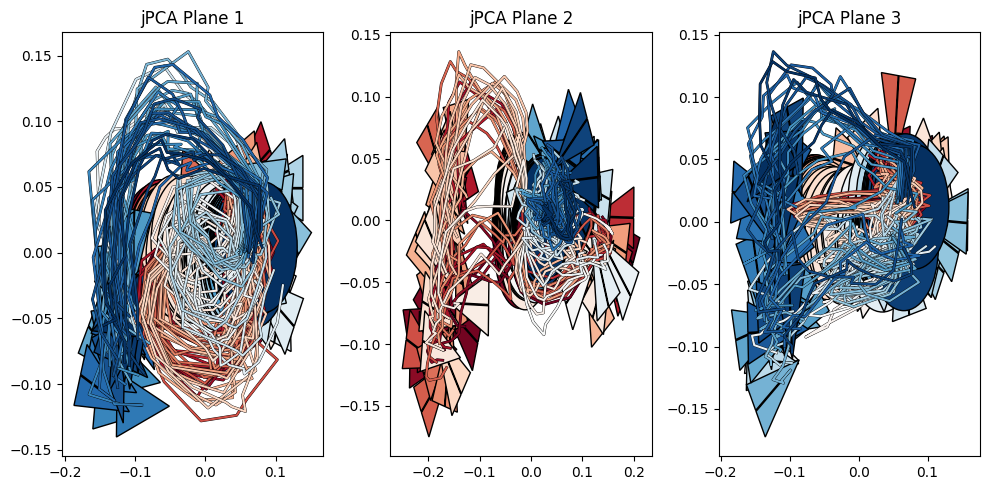

0.8636671937202742


In [27]:
B = "FiberJointwVel_Data.mat"
Fiber_JointwVel_Jpca = jPCA_Calc(B)

Fiber_JointwVel_Var = Fiber_JointwVel_Jpca.get_variance()

Variance["Fiber_JointwVel"] = Fiber_JointwVel_Var 


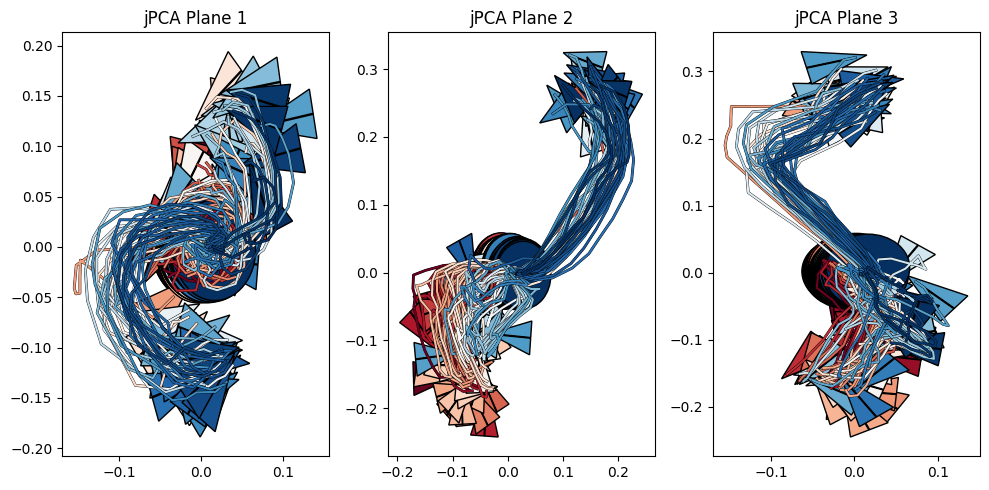

0.8929314425297118


In [28]:
B = "FiberJoint_Data.mat"
Fiber_Joint_Jpca = jPCA_Calc(B)

Fiber_Joint_Var = Fiber_Joint_Jpca.get_variance()

Variance["Fiber_Joint"] = Fiber_Joint_Var 


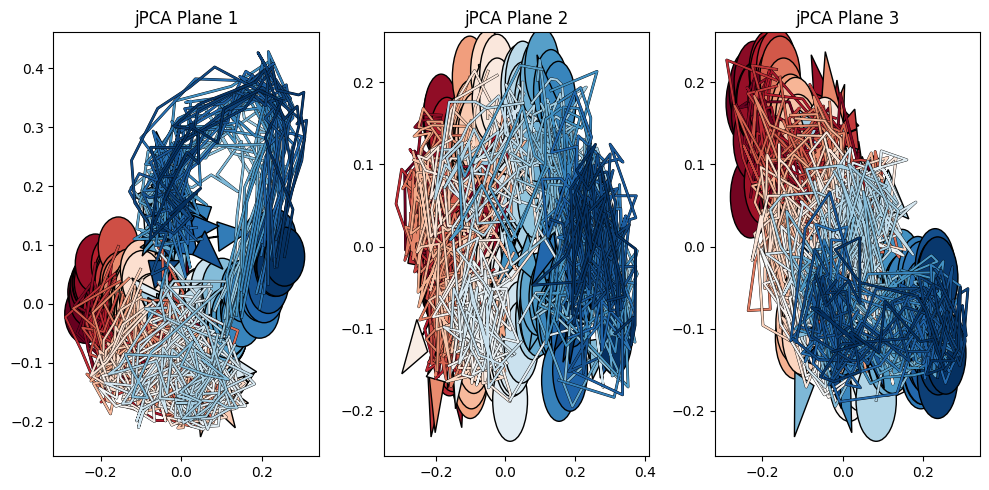

0.6844654436383563


In [29]:
B = "MuscleAct_Data.mat"
Muscle_Act_Jpca = jPCA_Calc(B)

Muscle_Act_Var = Muscle_Act_Jpca.get_variance()

Variance["Muscle_Act"] = Muscle_Act_Var


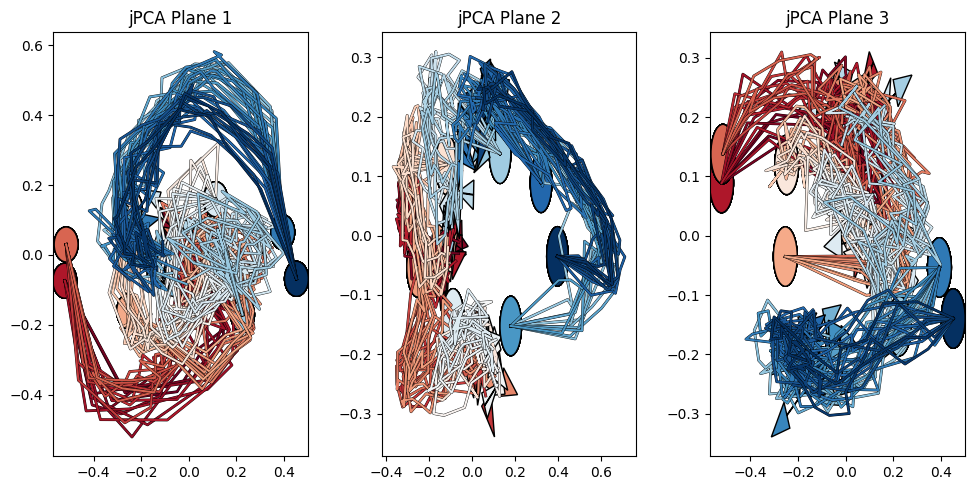

0.9487513161817491


In [ ]:
B = "Neural_Data.mat"
Neural_Data_Jpca = jPCA_Calc(B)

Neural_Data_Var = Neural_Data_Jpca.get_variance()

Variance["Neural_Data"] = Neural_Data_Var

In [37]:
for k,v in Variance.items():
    print(f"{k} : {v}") 

Fiber_JointwVel : 0.8636671937202742
Fiber_Joint : 0.8929314425297118
Muscle_Act : 0.6844654436383563
Neural_Data : 0.9487513161817491
